---
title: ML
description: "机器学习是一种人工智能的分支，旨在通过数据和算法使计算机系统能够自动改进其性能。"
created_at: 2025-04-18T01:06:10Z
updated_at: 2025-04-18T01:06:10Z
tags: [ML]
---

## 线性回归

In [ ]:
# 身高
data =   [40, 80, 50, 75, 120]
# 体重
target = [20, 70, 35, 50, 85 ]

# 绘制图像
import matplotlib.pyplot as plt # pip install matplotlib
# 设置中文 字体
# 以下命令查找字体路径
# fc-list :lang=zh
from matplotlib import rcParams
# 设置字体为思源黑体
rcParams['font.sans-serif'] = ['Source Han Sans CN']  # 设置字体
rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# plt.figure(figsize=(10, 6))
plt.scatter(data, target, color='blue', label='人')
plt.title('身高-体重')
plt.xlabel('身高')
plt.ylabel('体重')
plt.legend()
plt.grid()
plt.show()
# 线性回归
from sklearn.linear_model import LinearRegression # pip install scikit-learn
# 训练模型
model = LinearRegression()
# 训练数据
X = [[i] for i in data]
Y = target
model.fit(X, Y)
# 预测
pred = model.predict([[100]])
# 打印模型参数
print('截距:', model.intercept_)
print('斜率:', model.coef_)
print('预测体重:', pred)
# 画出回归线
import numpy as np
# 生成数据
x = np.linspace(0, 150, 100)
y = model.predict(x.reshape(-1, 1))

plt.figure(figsize=(10, 6))
# 绘制回归线
plt.plot(x, y, color='red', label='回归线')
# 绘制散点图
plt.scatter(data, target, color='blue', label='人')
plt.title('身高-体重')
plt.xlabel('身高')
plt.ylabel('体重')
plt.legend()
plt.grid()
plt.show()

### 预测函数
$$
% 对齐
\begin{align*}
\hat{y} &= kx + b \\ 
\hat{y} &= w_1 x_1 + w_2 x_2 + ... + w_n x_n + b \\
&= \sum_{i=1}^n w_i x_i + b \\
&= w^T x + b \\
\end{align*}
$$
也有如下写法:
$$
\begin{align*}
h_\theta(x) &= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n \\
&= \sum_{i=0}^n \theta_i x_i \ , \quad x_0 = 1 \\
&= \theta^T x
\end{align*}
$$

### 损失函数

而真实值和预测值之间的差异称为**损失、误差**, 记作 $\epsilon$

对于每个样本, 符合如下表达式:
$$
\begin{align*}
y^{(i)} &= h_\theta(x^{(i)}) + \epsilon^{(i)} \\
\end{align*}
$$

误差 $\epsilon^{(i)}$ 是独立并且具有相同的分布, 并且服从均值为 0, 方差为 **$\theta^T\theta$** 的正态分布:
$$
\begin{align*}
x &\sim \mathcal{N}(0, \sigma^2) \\
p(x) &= \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2}{2\sigma^2}} \\
\end{align*}
$$
那么:
$$
\begin{align*}
\epsilon^{(i)} &\sim \mathcal{N}(0, \theta^2) \\
p(\epsilon^{(i)}) &= \frac{1}{\sqrt{2\pi}\theta} e^{-\frac{\epsilon^{(i)2}}{2\theta^2}} \\
\end{align*}
$$

线性回归使用 **均方误差(MSE, Mean Squared Error)** 作为损失函数，定义为：

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2 $$ 
其中：

- $ m $：样本数量
- $ y_i $：第 $ i $ 个样本的真实值
- $ \hat{y}_i $：第 $ i $ 个样本的预测值

目标是最小化损失函数 $ \text{MSE} $，即找到最优的 $ \mathbf{w} $ 和 $ b $。

> [!NOTE]
> 注意其实还有其他的损失函数, 比如 MAE(Mean Absolute Error)
> 为什么选择 MSE 可以通过 最大似然估计来解释。假设误差服从正态分布，最小化 MSE 等价于最大化似然函数。

#### 似然函数
似然函数是统计学中的一个核心概念，用于衡量模型参数在给定数据下的“可能性”。假设我们有一个数据集 ${(x_i, y_i)}_{i=1}^n$，以及一个模型 $y = f(x; \theta)$，其中 $\theta$ 是模型的参数。

似然函数定义为： $$L(\theta) = P(y_1, y_2, \dots, y_n \mid x_1, x_2, \dots, x_n; \theta)$$ 即在给定输入数据 $x$ 的情况下，输出数据 $y$ 的联合概率分布。

为了方便计算，通常取对数似然函数： $$\ell(\theta) = \log L(\theta)$$

## Logistic 回归
是一种用于二分类问题的线性模型。它通过将线性回归的输出映射到 $[0, 1]$ 区间来实现分类。
- **线性回归**：预测的是连续值，模型形式为： $ y = \mathbf{w}^T \mathbf{x} + b $
- **Logistic 回归**：预测的是二分类问题(0或1)，模型形式为： $ P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) $，其中 $\sigma(z) = \frac{1}{1 + e^{-z}}$ 是 sigmoid 函数。

这个函数 将 输出映射到 (0, 1) 之间，这样就完成了 值 到 概率的转换

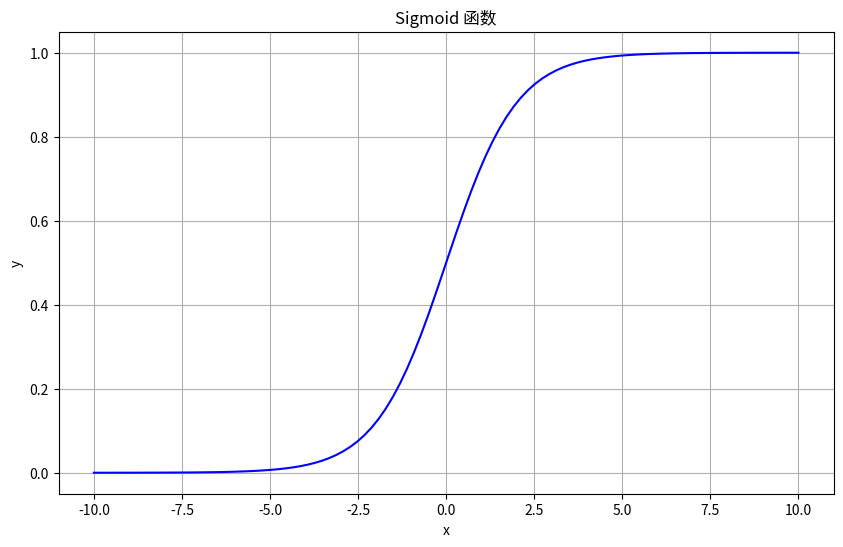

In [4]:
# 绘制 \frac{1}{1 + e^{-z}}
import numpy as np
import matplotlib.pyplot as plt
# 生成数据
x = np.linspace(-10, 10, 100)
# 计算 sigmoid 函数
y = 1 / (1 + np.exp(-x))
# 绘制图像
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')
plt.title('Sigmoid 函数')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

**预测函数**:
$$
\begin{align*}
h_\theta(x) &= \sigma(\theta^T x) \\
\end{align*}
$$

**分类任务**:
$$
\begin{equation}
\left\{
\begin{array}{l}
P(y = 1 \mid x,\theta) = h_\theta(x) \\
P(y = 0 \mid x,\theta) = 1 - h_\theta(x)
\end{array}
\right.
\end{equation}
$$

**整合**:
$$
P(y \mid x,\theta) = \prod_{i=1}^m P(y^{(i)} \mid x^{(i)},\theta) = \prod_{i=1}^m h_\theta(x^{(i)})^{y^{(i)}} (1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}
$$


### OR
逻辑回归能够得出比值比（Odds Ratio, OR）的原因在于其数学模型的构建方式与几率的定义直接相关。以下是详细的解释：

#### **1. 逻辑回归的基本原理**
逻辑回归用于预测二分类结果（如患病/不患病），其核心公式为：
\[
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
\]
其中：
- \(P(Y=1|X)\) 表示在自变量 \(X\) 的条件下，事件发生的概率。
- \(\beta_0\) 是截距项，\(\beta_1, \beta_2, \ldots, \beta_n\) 是自变量的回归系数。

#### **2. 从概率到几率（Odds）**
**几率（Odds）** 定义为事件发生概率与不发生概率的比值：
\[
\text{Odds} = \frac{P(Y=1)}{P(Y=0)} = \frac{P(Y=1)}{1 - P(Y=1)}
\]
将逻辑回归公式代入，可得：
\[
\text{Odds} = e^{\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n}
\]

#### **3. 逻辑回归系数与OR值的关系**
假设我们关注自变量 \(X_i\)，其他变量保持不变。当 \(X_i\) 增加1个单位时，新的几率为：
\[
\text{New Odds} = e^{\beta_0 + \beta_1 X_1 + \ldots + \beta_i (X_i + 1) + \ldots + \beta_n X_n} = \text{Original Odds} \times e^{\beta_i}
\]
因此，**OR值** 即为新旧几率的比值：
\[
OR = \frac{\text{New Odds}}{\text{Original Odds}} = e^{\beta_i}
\]

#### **4. OR值的实际解释**
- **OR > 1**：自变量 \(X_i\) 增加1单位时，事件发生的几率上升。
- **OR = 1**：自变量 \(X_i\) 对事件几率无影响。
- **OR < 1**：自变量 \(X_i\) 增加1单位时，事件发生的几率下降。

**示例**：  
若吸烟的回归系数 \(\beta = 0.693\)，则：
\[
OR = e^{0.693} \approx 2
\]
表示吸烟者的疾病发生几率是非吸烟者的2倍。

#### **5. 注意事项**
- **连续变量**：OR值解释为“每增加1单位的效应”。
- **分类变量**：需编码为哑变量（如0/1），OR值表示某类别相对于参照组的效应。
- **混杂因素**：需在模型中调整其他变量（如年龄、性别），以隔离目标变量的独立效应。
- **样本量**：小样本可能导致OR值的置信区间宽泛，需谨慎解读。

#### **总结**
逻辑回归通过建模事件的对数几率（log odds），使得回归系数 \(\beta_i\) 直接关联到OR值的自然对数。通过指数变换（\(e^{\beta_i}\)），我们能够直观地解释自变量对事件发生几率的影响强度。这一特性使逻辑回归成为医学、社会科学等领域中评估风险因素的强大工具。

In [ ]:
import pandas as pd # pip install pandas pyreadstat

# 读取 .dta 文件
file_path = "/home/aa/Downloads/H_CHARLS_D_Data.dta"
data = pd.read_stata(file_path)

# 查看数据
print(data.head())

             ID householdID communityID        hhid      hhidc pnc  pn  \
0  010104101001  0101041010     0101041  10104101.0  010104101  01   1   
1  010104101002  0101041010     0101041  10104101.0  010104101  02   2   
2  010104102001  0101041020     0101041  10104102.0  010104102  01   1   
3  010104102002  0101041020     0101041  10104102.0  010104102  02   2   
4  010104103001  0101041030     0101041  10104103.0  010104103  01   1   

         ID_w1 householdID_w1         s1id  ...             s3satlife  \
0  01010410101      010104101  01010410102  ...  3.Somewhat satisfied   
1  01010410102      010104101  01010410101  ...      4.Very satisfied   
2  01010410201      010104102  01010410202  ...      4.Very satisfied   
3  01010410202      010104102  01010410201  ...      4.Very satisfied   
4  01010410301      010104103  01010410302  ...  2.Not very satisfied   

              s4satlife r1satlifez  r2satlifez  r3satlifez  r4satlifez  \
0  3.Somewhat satisfied  -1.480748   -1.48

In [ ]:
# 查看数据的基本信息
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25586 entries, 0 to 25585
Columns: 3399 entries, ID to s4satlifez
dtypes: category(2160), float32(518), float64(705), int8(3), object(13)
memory usage: 243.8+ MB
None


- 行数：25586 行（样本数量）。
- 列数：3399 列（变量数量）
- 数据类型：
  - `category` ：2160 列，表示分类变量（通常是离散值，如性别、地区等）。
  - `float32` ：518 列，表示 32 位浮点数（通常是数值型变量）。
  - `float64` ：705 列，表示连续变量（更高精度的数值型变量）。
  - `int8` ：3 列，表示 8 位整数（通常是小范围的整数值）
  - `object` : 13 列，表示字符串或混合类型（如文本数据）。

In [7]:
# 可以查看所有列名，了解数据的结构和变量
print(data.columns)

Index(['ID', 'householdID', 'communityID', 'hhid', 'hhidc', 'pnc', 'pn',
       'ID_w1', 'householdID_w1', 's1id',
       ...
       's3satlife', 's4satlife', 'r1satlifez', 'r2satlifez', 'r3satlifez',
       'r4satlifez', 's1satlifez', 's2satlifez', 's3satlifez', 's4satlifez'],
      dtype='object', length=3399)


In [ ]:
data.to_csv("H_CHARLS_D_Data.csv", index=False)

In [ ]:
# 查看数据的描述性统计
# print(data.describe())

## 预处理

### 分类变量

在逻辑回归中，**哑变量（Dummy Encoding）** 是一种常用的编码方式，它会自动将多类别分类变量转换为多个二进制变量（0 或 1），但会**丢弃一个基准类别**，以避免多重共线性（Multicollinearity）。以下是详细解释：

---

### **1. 为什么三种值的分类变量哑变量后只有两个字段？**
假设有一个分类变量 `cluster`，它有三个类别：`1`、`2` 和 `3`。在哑变量编码时：
- `cluster=1` 被设为基准类别（Reference Category）。
- `cluster=2` 和 `cluster=3` 被分别编码为两个二进制变量：
  - `cluster_2`：`1` 表示 `cluster=2`，`0` 表示其他。
  - `cluster_3`：`1` 表示 `cluster=3`，`0` 表示其他。

因此，`cluster=1` 的信息可以通过 `cluster_2=0` 且 `cluster_3=0` 推导出来，不需要单独为 `cluster=1` 创建一个变量。

这种方式避免了多重共线性问题，因为如果保留所有类别的哑变量，变量之间会存在线性依赖关系（即 `cluster_1 + cluster_2 + cluster_3 = 1`）。

---

### **2. 哑变量和独热编码的区别**
| **编码方式**      | **特点**                                                                                     | **适用场景**                                                                 |
|-------------------|---------------------------------------------------------------------------------------------|------------------------------------------------------------------------------|
| **哑变量编码**    | - 丢弃一个基准类别，避免多重共线性。<br>- 生成 `n-1` 个二进制变量（`n` 是类别数）。          | - **逻辑回归**等线性模型，避免多重共线性问题。                               |
| **独热编码**      | - 为每个类别生成一个二进制变量，不丢弃任何类别。<br>- 生成 `n` 个二进制变量。                | - **决策树**、**神经网络**等非线性模型，不受多重共线性影响。                 |

---

### **3. 为什么逻辑回归一般用哑变量？**
逻辑回归是一种线性模型，要求自变量之间不能存在多重共线性。如果使用独热编码，所有类别的变量会同时存在，导致多重共线性问题，影响模型的稳定性和参数估计的准确性。

#### **示例：哑变量编码**
假设 `cluster` 有 3 个类别：
```python
import pandas as pd

data = {'cluster': [1, 2, 3, 1, 2, 3]}
df = pd.DataFrame(data)

# 哑变量编码
df_dummy = pd.get_dummies(df, columns=['cluster'], drop_first=True)
print(df_dummy)
```

**输出**：
```plaintext
   cluster_2  cluster_3
0          0          0
1          1          0
2          0          1
3          0          0
4          1          0
5          0          1
```

- `cluster_2` 和 `cluster_3` 表示 `cluster=2` 和 `cluster=3` 的情况。
- `cluster=1` 是基准类别，不需要单独编码。

---

### **4. 独热编码的示例**
如果使用独热编码（One-Hot Encoding），则会为每个类别生成一个变量：
```python
# 独热编码
df_onehot = pd.get_dummies(df, columns=['cluster'], drop_first=False)
print(df_onehot)
```

**输出**：
```plaintext
   cluster_1  cluster_2  cluster_3
0          1          0          0
1          0          1          0
2          0          0          1
3          1          0          0
4          0          1          0
5          0          0          1
```

- `cluster_1`、`cluster_2` 和 `cluster_3` 都被编码为独立的二进制变量。
- 这种方式适合非线性模型（如决策树、神经网络），因为它们不受多重共线性影响。

---

### **5. 总结**
- **逻辑回归一般使用哑变量编码**，因为它会丢弃一个基准类别，避免多重共线性问题。
- **独热编码**适用于非线性模型（如决策树、神经网络），因为这些模型不受多重共线性影响。
- 在逻辑回归中，哑变量编码的结果是 `n-1` 个变量，而独热编码的结果是 `n` 个变量。

如果你使用的是逻辑回归，请确保使用哑变量编码，并通过 `drop_first=True` 丢弃一个基准类别。